# Solutions

1. [Datetime and Timedelta](#1.-Datetime-and-Timedelta)
1. [Introduction to Time Series](#2.-Introduction-to-Time-Series)
1. [Grouping by Time](#3.-Grouping-by-Time)
1. [Rolling Windows](#4.-Rolling-Windows)
1. [Grouping by Time and another Column](#5.-Grouping-by-Time-and-another-Column)

## 1. Datetime and Timedelta

In [1]:
import pandas as pd

### Exercise 1
<span  style="color:green; font-size:16px">What day of the week was Jan 15, 1997?</span>

In [2]:
dt = pd.to_datetime('Jan 15, 1997')
dt.day_name()

'Wednesday'

### Exercise 2
<span  style="color:green; font-size:16px">Was 1925 a leap year?</span>

In [3]:
dt = pd.to_datetime('Jan 1, 1924')
dt.is_leap_year

True

### Exercise 3
<span  style="color:green; font-size:16px">What year will it be 1 million hours after the UNIX epoch?</span>

In [4]:
dt = pd.to_datetime(10 ** 6, unit='h')
dt

Timestamp('2084-01-29 16:00:00')

In [5]:
dt.year

2084

### Exercise 4
<span  style="color:green; font-size:16px">Create the datetime July 20, 1969 at 2:56 a.m. and 15 seconds.</span>

In [6]:
dt = pd.to_datetime('1969-07-20 2:56:15')
dt

Timestamp('1969-07-20 02:56:15')

### Exercise 5
<span  style="color:green; font-size:16px">Neil Armstrong stepped on the moon at the time in the last Exercise. How many days have passed since that happened? Use the string 'today' when creating your datetime.</span>

In [7]:
dt1 = pd.to_datetime('1969-07-20 2:56:15')
dt2 = pd.to_datetime('today')
dt2

Timestamp('2019-10-31 15:44:09.738360')

In [8]:
td = dt2 - dt1
td

Timedelta('18365 days 12:47:54.738360')

In [9]:
td.days

18365

### Exercise 6
<span  style="color:green; font-size:16px">Which is larger - 35 days or 700 hours?</span>

In [10]:
td1 = pd.to_timedelta(35, unit='d')
td2 = pd.to_timedelta(700, unit='h')

In [11]:
td1

Timedelta('35 days 00:00:00')

In [12]:
td2

Timedelta('29 days 04:00:00')

In [13]:
td1 > td2

True

Can also use a string for hours

In [14]:
pd.to_timedelta('700 hours')

Timedelta('29 days 04:00:00')

In [15]:
pd.to_timedelta('700h')

Timedelta('29 days 04:00:00')

### Exercise 7
<span  style="color:green; font-size:16px">In a previous notebook, we were told that the employee data was retrieved on Dec 1, 2016. We used the simple calculation `2016 - emp['hire_date'].dt.year` to determine the years of experience. Can you improve upon this method to get the exact amount of years of experience and assign as a new column named `experience`?</span>

In [16]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])

In [17]:
pull_date = pd.to_datetime('2016-1-1')
one_year = pd.to_timedelta(1, unit='Y')

/Users/Ted/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)
/Users/Ted/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/tools/timedeltas.py:134: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  result = Timedelta(r, unit)


In [18]:
pull_date

Timestamp('2016-01-01 00:00:00')

In [19]:
one_year

Timedelta('365 days 05:49:12')

In [20]:
emp['experience'] = (pull_date - emp['hire_date']) / one_year
emp.head()

,dept,title,hire_date,salary,sex,race,experience
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White,14.078318
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic,5.128100
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black,9.976933
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic,18.598602
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White,9.938602


## 2. Introduction to Time Series

### Exercise 1
<span  style="color:green; font-size:16px">Read in the weather time series dataset and place the date column in the index.</span>

In [21]:
weather = pd.read_csv('../data/weather.csv', parse_dates=['date'], index_col='date')
weather.head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-01-02,No,No,55.9
2007-01-03,No,No,62.1
2007-01-04,No,No,69.1
2007-01-05,Yes,No,72.0


### Exercise 2
<span  style="color:green; font-size:16px">What was the temperature on June 11, 2011?</span>

In [22]:
weather.loc['2011-6-11', 'temperature']

93.9

### Exercise 3
<span  style="color:green; font-size:16px">How many days did it rain during the last three months of 2011?</span>

In [23]:
weather.loc['2011-10':'2011-12', 'rain'].value_counts()

No     69
Yes    23
Name: rain, dtype: int64

### Exercise 4
<span  style="color:green; font-size:16px">Which year had more snow days, 2007 or 2012?</span>

In [24]:
weather.loc['2007', 'snow'].value_counts()

No     360
Yes      5
Name: snow, dtype: int64

In [25]:
weather.loc['2012', 'snow'].value_counts()

No     364
Yes      2
Name: snow, dtype: int64

### Exercise 5
<span  style="color:green; font-size:16px">Select every other thursday</span>

In [26]:
weather.asfreq('2W-THU').head()

,rain,snow,temperature
date,,,
2007-01-04,No,No,69.1
2007-01-18,Yes,Yes,35.1
2007-02-01,Yes,Yes,34.0
2007-02-15,No,No,39.9
2007-03-01,Yes,No,66.9


### Exercise 6
<span  style="color:green; font-size:16px">Select the first day of each month.</span>

In [27]:
weather.asfreq('MS').head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-02-01,Yes,Yes,34.0
2007-03-01,Yes,No,66.9
2007-04-01,Yes,No,77.0
2007-05-01,No,No,91.9


In [28]:
weather.asfreq('4M')

,rain,snow,temperature
date,,,
2007-01-31,No,No,39.9
2007-05-31,No,No,91.0
2007-09-30,No,No,80.1
2008-01-31,No,No,51.1
2008-05-31,No,No,89.1
2008-09-30,Yes,No,81.0
2009-01-31,No,No,46.9
2009-05-31,Yes,No,88.0
2009-09-30,No,No,75.0


## 3. Grouping by Time

In [29]:
import pandas as pd
msft = pd.read_csv('../data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head(3)

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.25,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.25,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.50,93.063,30.0381,60801200,0.0


### Exercise 1
<span  style="color:green; font-size:16px">In which week did MSFT have the greatest number of its shares (volume) traded?</span>

In [30]:
volume = msft.resample('W').agg({'volume':'sum'})
volume.head()

,volume
date,
1999-10-24,262488000
1999-10-31,287399400
1999-11-07,268534000
1999-11-14,541663200
1999-11-21,295783800


In [31]:
volume.agg(['max', 'idxmax'])

,volume
max,879723200
idxmax,2006-05-07 00:00:00


### Pandas Trick
Turn into a period to get Monday-Sunday date range

In [32]:
msft.resample('W', kind='period').agg({'volume':'sum'}).agg(['max', 'idxmax'])

,volume
max,879723200
idxmax,2006-05-01/2006-05-07


### Exercise 2

<span  style="color:green; font-size:16px">With help from the `diff` method, find the quarter containing the most number of up days.</span>

Use diff to find the difference between the current row and the one directly above it.

In [33]:
msft['adjusted_close'].diff().head()

date
1999-10-19       NaN
1999-10-20    1.9164
1999-10-21    0.2623
1999-10-22   -0.1210
1999-10-25   -0.0807
Name: adjusted_close, dtype: float64

In [34]:
up_days = msft['adjusted_close'].diff() > 0
up_days.head()

date
1999-10-19    False
1999-10-20     True
1999-10-21     True
1999-10-22    False
1999-10-25    False
Name: adjusted_close, dtype: bool

In [35]:
up_days.resample('Q').sum().head()

date
1999-12-31    24.0
2000-03-31    32.0
2000-06-30    30.0
2000-09-30    23.0
2000-12-31    29.0
Freq: Q-DEC, Name: adjusted_close, dtype: float64

In [36]:
up_days.resample('Q').sum().agg(['max', 'idxmax'])

max                        43
idxmax    2001-12-31 00:00:00
Name: adjusted_close, dtype: object

### Pandas trick

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Can visually verify with plot:

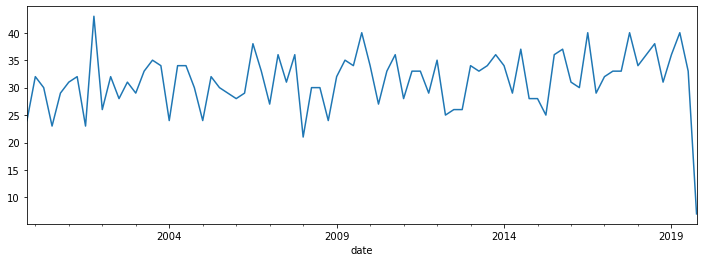

In [38]:
up_days.resample('Q', kind='period').sum().plot(figsize=(12,4))

### Exercise 3

<span  style="color:green; font-size:16px">Find the mean price per year along with the minimum and maximum volume.</span>

In [39]:
msft.resample('Y', kind='period').agg({'adjusted_close': 'mean', 
                                       'volume':['min', 'max']}).head()

adjusted_close    volume           
               mean       min        max
date                                    
1999      31.267802  12517600  243819200
2000      24.601943  15734800  313645800
2001      20.186950  11701600  209348800
2002      17.606981  18386000  202307800
2003      16.917920  12076900  210558300

Execute the cell below to read in the employee dataset and use it for the rest of the exercises.

In [40]:
emp = pd.read_csv('../data/employee.csv')

### Exercise 4

<span  style="color:green; font-size:16px">Use the `to_datetime` function to convert the hire date column into datetimes. Reassign this column in the `emp` DataFrame.</span>

In [41]:
emp['hire_date'] = pd.to_datetime(emp['hire_date'])

### Exercise 5

<span  style="color:green; font-size:16px">Without putting `hire_date` into the index, find the mean salary based on `hire_date` over 5 year periods. Also return the number of salaries used in the mean calculation for each period.</span>

In [42]:
emp.resample('5Y', on='hire_date').agg({'salary':['mean', 'count']})

salary      
                    mean count
hire_date                     
1968-12-31           NaN     0
1973-12-31  64574.640000     4
1978-12-31  78074.008667    30
1983-12-31  73504.712738   336
1988-12-31  70655.520653   613
1993-12-31  69255.759681  1946
1998-12-31  67875.931733  2424
2003-12-31  63357.963896  2618
2008-12-31  60447.709702  4329
2013-12-31  56581.778488  3453
2018-12-31  48230.686634  7609

## 4. Rolling Windows

### Exercise 1
<span  style="color:green; font-size:16px">Attempt to take a rolling average on salary using a 30 day time span on hire date. Does the error message make sense?</span>

In [43]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])

In [44]:
emp.rolling('30D', on='hire_date')

ValueError: hire_date must be monotonic

Yes, the error message makes sense. If you are going to do a rolling average by an amount of time, then the dates need to be sorted. Monotonic means all increasing or all decreasing.

### Exercise 2
<span  style="color:green; font-size:16px">Set hire date as the index and then select the salary column as a Series. Sort the Series by date and drop the missing values. Now select a subset that only has hire dates from 1990 onwards. Then find a 1,000 day rolling average. Finally make a call to the `plot` method. Make sure you inline matplotlib if you did not do it earlier.</span>

In [45]:
%matplotlib inline

In [46]:
sal = emp.set_index('hire_date')['salary'].sort_index().dropna()

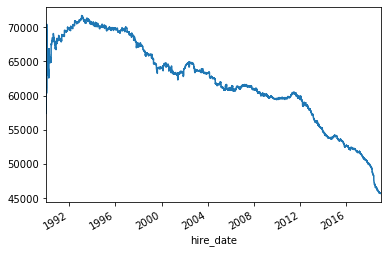

In [47]:
sal['1990':].rolling('1000D').mean().plot()

### Exercise 3
<span  style="color:green; font-size:16px">Read in the energy consumption dataset. Select just the residential source and plot a 12 month trailing rolling mean of the energy.</span>

In [48]:
energy = pd.read_csv('../data/energy_consumption.csv', parse_dates=['date'], index_col='date')
energy.head()

,source,energy (btu)
date,,
1973-01-01,residential,1932.187
1973-02-01,residential,1687.255
1973-03-01,residential,1497.067
1973-04-01,residential,1177.661
1973-05-01,residential,1015.008


In [49]:
filt = energy['source'] == 'residential'
res_energy = energy.loc[filt, 'energy (btu)']
res_energy.head()

date
1973-01-01    1932.187
1973-02-01    1687.255
1973-03-01    1497.067
1973-04-01    1177.661
1973-05-01    1015.008
Name: energy (btu), dtype: float64

If you try to use an offset alias here, you will get an error because Pandas does not consider a year to be a fixed frequency.

In [50]:
res_energy.rolling('Y').mean()

ValueError: <YearEnd: month=12> is a non-fixed frequency

Instead, you can use the integer 12 (assuming you check that there is data for each month).

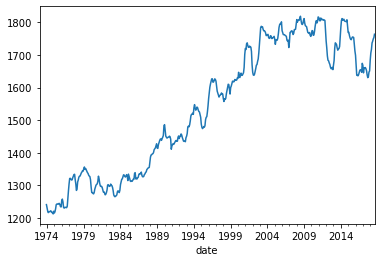

In [51]:
res_energy.rolling(12).mean().plot()

## 5. Grouping by Time and another Column

In [52]:
import numpy as np

### Exercise 1
<span  style="color:green; font-size:16px">Read in the energy consumption dataset. Find the average energy consumption per sector per 10 year time span beginning from the first year of data. Return the results as both a groupby and a pivot table. Experiment with adding 'S' to the end of your offset alias. How does this change the results?</span>

In [53]:
energy = pd.read_csv('../data/energy_consumption.csv', parse_dates=['date'], index_col='date')
energy.head()

,source,energy (btu)
date,,
1973-01-01,residential,1932.187
1973-02-01,residential,1687.255
1973-03-01,residential,1497.067
1973-04-01,residential,1177.661
1973-05-01,residential,1015.008


By default, the offset alias 'Y' represents the year end. So the first date for each source is the time span of Jan 1, 1964 - Dec 31, 1973. It is instructive to also find the size of each group to determine how many rows were aggregated.

In [54]:
tg = pd.Grouper(freq='10Y')
energy.groupby(['source', tg]).agg({'energy (btu)':['sum', np.size]}).astype('int')

energy (btu)     
                                   sum size
source         date                        
commercial     1973-12-31         9544   12
               1983-12-31       103325  120
               1993-12-31       126317  120
               2003-12-31       161011  120
               2013-12-31       179146  120
               2023-12-31        84850   56
industrial     1973-12-31        32622   12
               1983-12-31       309268  120
               1993-12-31       306423  120
               2003-12-31       339772  120
               2013-12-31       314844  120
               2023-12-31       148435   56
residential    1973-12-31        14895   12
               1983-12-31       154427  120
               1993-12-31       169077  120
               2003-12-31       195951  120
               2013-12-31       211653  120
               2023-12-31        96460   56
transportation 1973-12-31        18612   12
               1983-12-31       193850  120
               1993-12-31       216420  120
               2003-12-31       253859  120
               2013-12-31       274295  120
               2023-12-31       129451   56

Appending an 'S' to the offset alias string makes pandas treat the first observation as the beginning of the time period. The first group is from Jan 1, 1973 to Dec 31, 1982 and this is likely what you would want.

In [55]:
tg = pd.Grouper(freq='10YS')
energy.groupby(['source', tg]).agg({'energy (btu)':['sum', np.size]}).astype('int')

energy (btu)     
                                   sum size
source         date                        
commercial     1973-01-01       101931  120
               1983-01-01       123438  120
               1993-01-01       157480  120
               2003-01-01       178566  120
               2013-01-01       102779   68
industrial     1973-01-01       314461  120
               1983-01-01       301236  120
               1993-01-01       339833  120
               2003-01-01       315776  120
               2013-01-01       180058   68
residential    1973-01-01       153900  120
               1983-01-01       166286  120
               1993-01-01       193051  120
               2003-01-01       211705  120
               2013-01-01       117522   68
transportation 1973-01-01       193286  120
               1983-01-01       212926  120
               1993-01-01       249648  120
               2003-01-01       274455  120
               2013-01-01       156173   68

In [56]:
df = energy.pivot_table(index=tg, columns='source', 
                        values='energy (btu)', aggfunc='sum').astype('int')
df

source,commercial,industrial,residential,transportation
date,,,,
1973-01-01,101931,314461,153900,193286
1983-01-01,123438,301236,166286,212926
1993-01-01,157480,339833,193051,249648
2003-01-01,178566,315776,211705,274455
2013-01-01,102779,180058,117522,156173


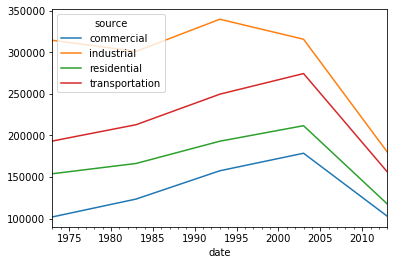

In [58]:
df.plot();